<h1 style="font-family:serif" align=center>Predictor of House Prices in King County, WA</h1>
<h2 style="font-family:serif" align=center>By: Ashan Panduwawala, Hyekang (Kevin) Joo, & Krishan Panduwawala</h2>
<h3 style="font-family:serif" align=center>Date: Fall 2019</h3>
<img src="https://cdn.geekwire.com/wp-content/uploads/2016/09/seattlenightsky.jpg" height="510" width="1920"/>
<h1> Introduction </h1>
<h5> Today, the headquarters of a lot of big tech companies are based in the west coast – especially in Washington state.  Out of all cities in Washington, companies tend to like Seattle region (King County, WA) the most. 

Each summer, students apply for tech internships to perform an internship over summer, and those who are offered an internship opportunity receive a chance to consider working for the company he or she received an offer from. 

While making a decision, students take a lot of factors into consideration: prestige, pay, responsibilities, perks, etc.  However, one factor that weigh one of the highest in making the decision is housing – whether they are provided with a corporate housing, how much they would be provided with otherwise, and, especially, how much the houses are in the region since the region is most likely where they will need to settle down should they receive a full-time conversion offer. 

After browsing apartments online, students run into many expensive houses and many affordable ones; however, the main issue is that they don't know what a reasonable price is given certain aspects of the house that they find ideal.

In order to help students determine the price of a house in King County, WA based on attributes of a house they are looking for, we have decided to create a house price prediction calculator that would predict the price of a house through machine learning and analyses based on their inputs of the attributes of a house sought.</h5>

<br />
<h5>Data Credits: U.S. Census, SimpleCity.com, harlfoxem @ Kaggle</h5>


<hr/>
<h2>Dataset</h2>
<p>Dataframe below is the pandas representation of the raw, untouched data acquired from Kaggle.</p>

In [0]:
import re
import folium
import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
from mpl_toolkits import mplot3d
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# US Zip Code and Coordinates 
# -- Credits: US Census (https://www.census.gov/programs-surveys/geography.html)
url_US_zipcodes = "https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data"

# US Zip Code and City 
# -- Credits: SimpleCity.com
url_zip_to_city = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQpx_wI_mOREzi3PxoG8aiqd4Kp3D2txHiVyn7bGrivO5ia9sIsTa9ydaeEEcMCUuMHQiznT7rRc3XI/pub?gid=986305031&single=true&output=csv'

# House Sales in King County, USA 
# -- Credits: harlfoxem (https://www.kaggle.com/harlfoxem/housesalesprediction)
url_housing_data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWAIquMjpqsOk34WbFsAgvIveBF9YXHVauCV0DLAS-_RDUkMHh5IOG4ir03ECe1N_fm7s1-0wiQkE5/pub?gid=868760569&single=true&output=csv'

df = pd.read_csv(url_housing_data)
df # Raw, untouched data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<hr/>
<h2> Data Cleaning and Data Normalization </h2>
<p>The dataframe below is the dataset of the raw data after normalization and data cleaning.</p>


In [0]:
# Normalizing dataset
def norm(arr):
  minimum = min(arr)
  maximum = max(arr)

  return [(i - minimum) / (maximum - minimum) for i in arr]

# Getting rid of outliers by removing the top 1% and bottom 1% of 
#  each category of the dataset -- 94.7% of dataset remaining
normalized_df = df[df['price'].between(df['price'].quantile(0.005), 
                                       df['price'].quantile(0.995)) &
                   df['bedrooms'].between(df['bedrooms'].quantile(0.005), 
                                       df['bedrooms'].quantile(0.995)) &
                   df['bathrooms'].between(df['bathrooms'].quantile(0.005), 
                                       df['bathrooms'].quantile(0.995)) &
                   df['sqft_living'].between(df['sqft_living'].quantile(0.005), 
                                       df['sqft_living'].quantile(0.995)) &
                   df['sqft_lot'].between(df['sqft_lot'].quantile(0.005), 
                                       df['sqft_lot'].quantile(0.995)) &
                   df['floors'].between(df['floors'].quantile(0.005), 
                                       df['floors'].quantile(0.995)) &
                   df['view'].between(df['view'].quantile(0.005), 
                                       df['view'].quantile(0.995)) &
                   df['condition'].between(df['condition'].quantile(0.005), 
                                       df['condition'].quantile(0.995)) &
                   df['grade'].between(df['grade'].quantile(0.005), 
                                       df['grade'].quantile(0.995)) &
                   df['sqft_above'].between(df['sqft_above'].quantile(0.005), 
                                       df['sqft_above'].quantile(0.995)) &
                   df['sqft_basement'].between(df['sqft_basement'].quantile(0.005), 
                                       df['sqft_basement'].quantile(0.995)) &
                   df['yr_built'].between(df['yr_built'].quantile(0.005), 
                                       df['yr_built'].quantile(0.995)) &
                   df['yr_renovated'].between(df['yr_renovated'].quantile(0.005), 
                                       df['yr_renovated'].quantile(0.995))
                   ]                                       

# The number of data samples
COUNT = len(normalized_df)

# Cleaning zip_to_city csv data
zip_df = pd.read_csv(url_zip_to_city)
zip_df = zip_df.drop(['lat', 'lng', 'state_name', 'zcta', 'parent_zcta', 
                      'population', 'density', 'county_fips', 'county_name', 
                      'all_county_weights', 'imprecise', 'military', 
                      'timezone'], axis=1)
zip_df["zipcode"] = zip_df['zip'].astype(int)

# Merging the zipcode data with df
normalized_df = pd.merge(zip_df, normalized_df, how="inner", on="zipcode")

normalized_df = normalized_df.reset_index()

# Making the cities lower case
normalized_df["city"] = normalized_df["city"].apply(lambda x: x.lower())

# For normalization, substituting rows with an empty 'yr_renovated' value
#   for a 'yr_built' value. 
normalized_df['yr_renovated'] = [normalized_df['yr_built'][i] \
                                 if normalized_df['yr_renovated'][i] == 0 \
                                 else normalized_df['yr_renovated'][i] \
                                 for i in range(COUNT)]

# Making a column for sqft_interior by summing up some sqft values
normalized_df['sqft_interior'] = np.array(normalized_df['sqft_above']) + \
                                 np.array(normalized_df['sqft_basement']) + \
                                 np.array(normalized_df['sqft_living'])

# Keeping the non-normalized year as reference
normalized_df['non_normalized_yr'] = normalized_df['yr_renovated']

# Fields that will be normalized
normalized_fields = ['bedrooms', 'bathrooms', 'sqft_living', 
                     'sqft_lot', 'floors', 'view', 'condition', 'grade', 
                     'sqft_interior', 'sqft_above', 'sqft_basement', 
                     'yr_built', 'yr_renovated']

# Normalization
for i in normalized_fields:
  normalized_df[i] = norm(normalized_df[i])

# Removing the unused fields
normalized_df = normalized_df.drop(['index', 'id', 'date', 'waterfront', 
                                    'sqft_living', 'sqft_above', 
                                    'sqft_basement', 'sqft_living15', 
                                    'sqft_lot15'], axis=1)

# Rearranging the columns
normalized_df = normalized_df[['price', 'bedrooms', 'bathrooms', 
                               'sqft_interior', 'sqft_lot', 'floors', 'view', 
                               'condition', 'grade', 'yr_built', 'yr_renovated', 
                               'non_normalized_yr', 'city', 'zipcode', 'lat', 
                               'long']]

# Dataframe after data cleaning and normalization
normalized_df

,price,bedrooms,bathrooms,sqft_interior,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,non_normalized_yr,city,zipcode,lat,long
0,240000.0,0.6,0.000000,0.112245,0.029232,0.00,0.00,0.000000,0.333333,0.601770,0.601770,1969,auburn,98001,47.3341,-122.282
1,287000.0,0.6,0.428571,0.320408,0.015256,0.50,0.00,0.333333,0.333333,0.920354,0.920354,2005,auburn,98001,47.3378,-122.257
2,480000.0,0.6,0.428571,0.522449,0.062249,0.50,0.75,0.333333,0.666667,0.884956,0.884956,2001,auburn,98001,47.3183,-122.253
3,465000.0,0.4,0.428571,0.417143,0.069447,0.50,0.00,0.333333,0.666667,0.920354,0.920354,2005,auburn,98001,47.3185,-122.275
4,360000.0,0.6,0.428571,0.304082,0.035158,0.50,0.00,0.333333,0.666667,0.805310,0.805310,1992,auburn,98001,47.3341,-122.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20470,570000.0,0.4,0.642857,0.179592,0.001521,0.50,0.00,0.333333,0.666667,0.991150,0.991150,2013,seattle,98199,47.6493,-122.384
20471,1110000.0,0.6,0.714286,0.610204,0.015713,0.50,0.00,0.333333,0.666667,1.000000,1.000000,2014,seattle,98199,47.6482,-122.409
20472,1010000.0,0.6,0.642857,0.600000,0.012614,0.50,0.00,0.333333,0.666667,0.938053,0.938053,2007,seattle,98199,47.6580,-122.396
20473,453000.0,0.4,0.428571,0.171429,0.002900,0.75,0.00,0.333333,0.500000,0.973451,0.973451,2011,seattle,98199,47.6515,-122.384


Every column has been normalized in the data except the price, city, zipcode, latitude, and longitude.

<hr/>
<h2> Visual Representation of Trends in the Data </h2>

After normalization, most of the fields have been re-mapped to some figure between 0 and 1 proportionately.

In order to observe the trend in each dataset, the values of each dataset has been sorted in a descending order.

Based on the graphs below, it can be observed that some have a normal distribution 
(vertical sigmoid shaped graphs), some are heavily skewed, and some have big outliers. 


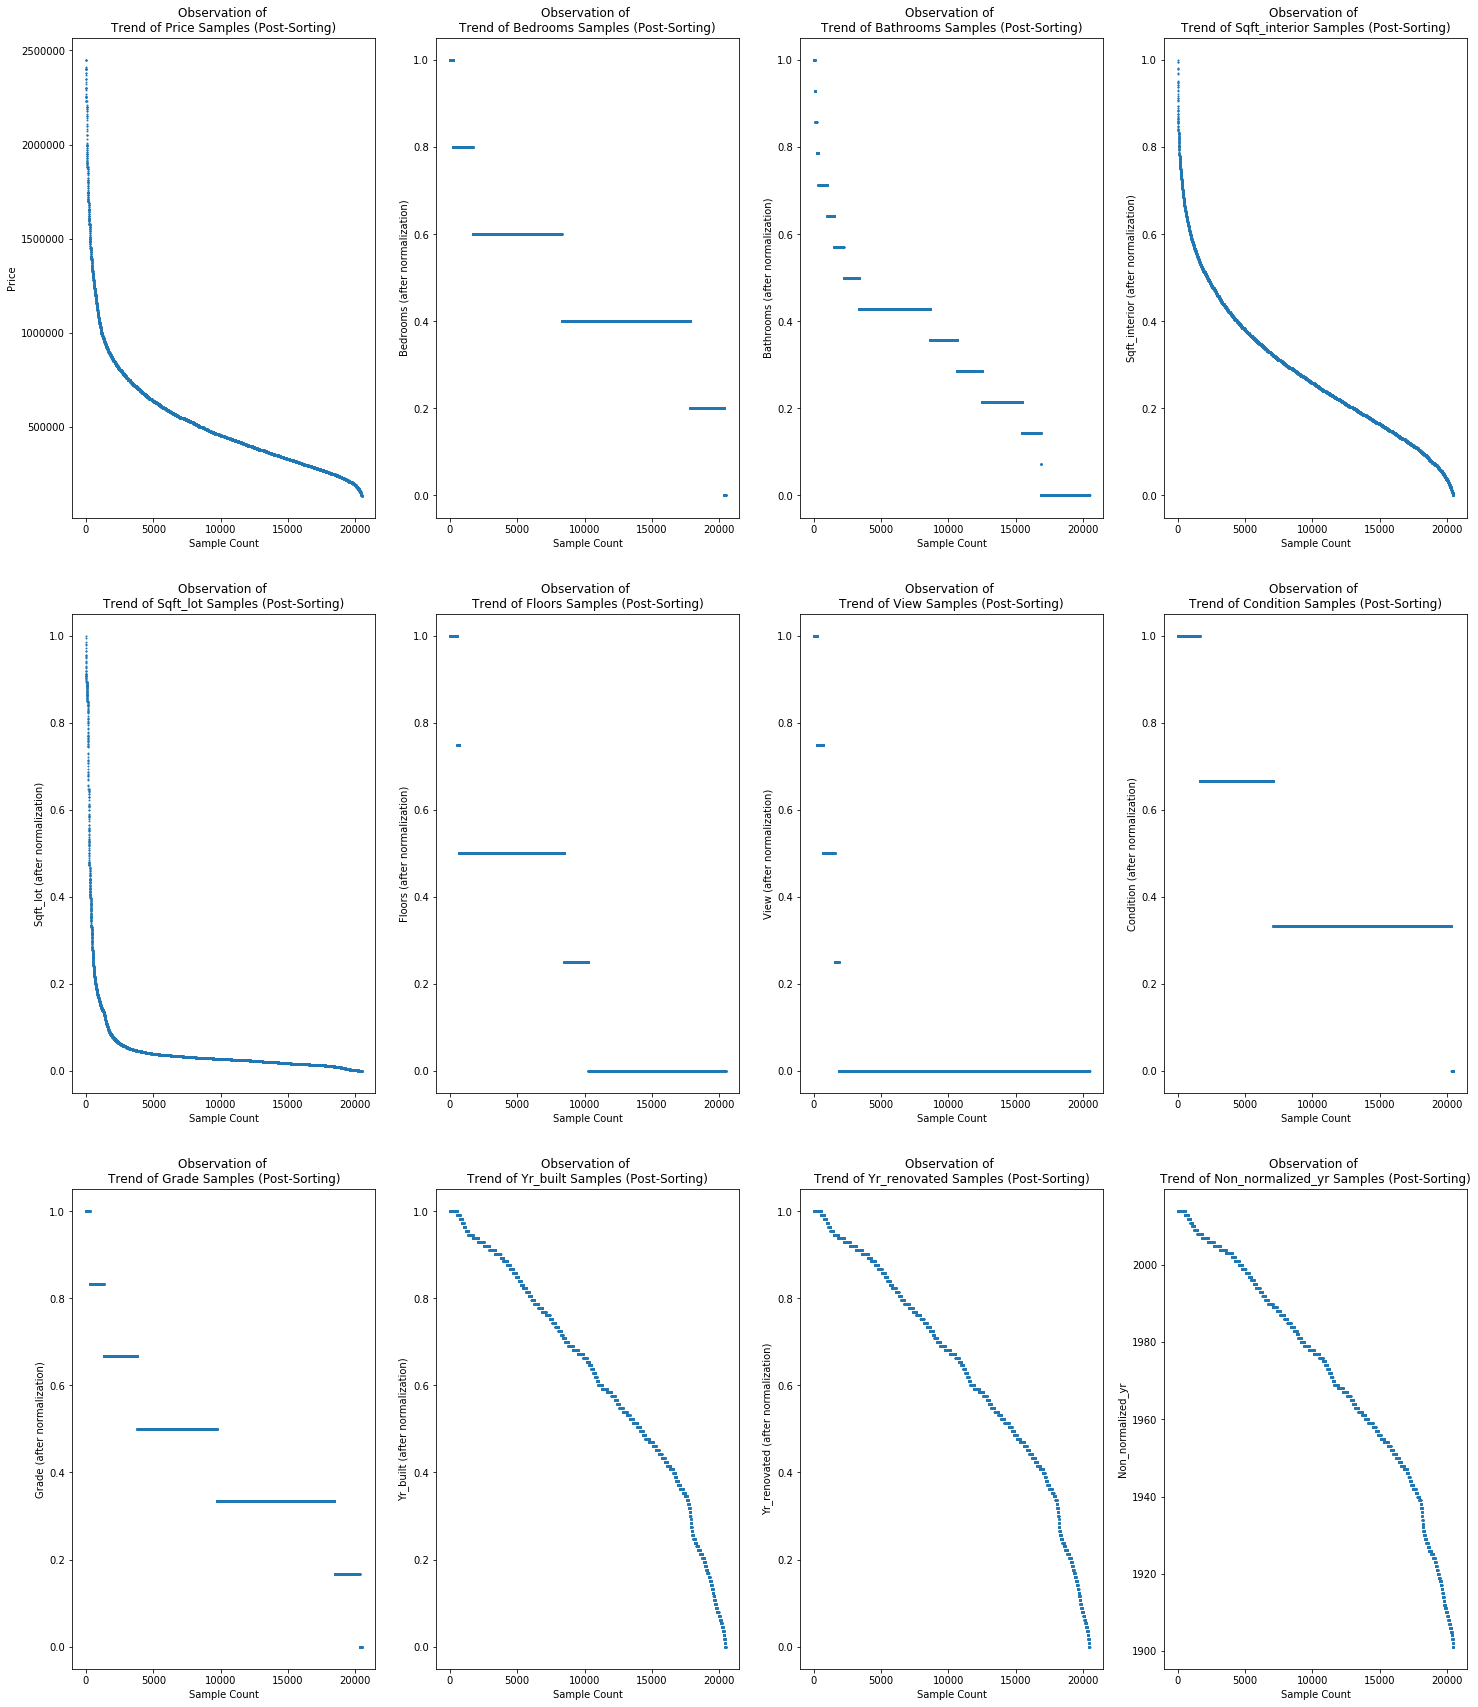

In [0]:
# Distribution of each catogory sorted from highest to lowest (post-normalized)
ROW = 3
COL = 4
counter = 0
cap = COL
fig, axes = plt.subplots(ROW, COL, figsize=(25, 30))

def convert_1d_to_2d(ind, cap):
  return (ind // cap, ind % cap)

for field in normalized_df.columns[:-4]:
  r, c = convert_1d_to_2d(counter, cap)
  counter += 1

  # Sorting each field from highest to lowest 
  temp = normalized_df.sort_values(by=field, ascending=False)
  axes[r, c].set_title('Observation of \nTrend of {}{} Samples (Post-Sorting)' \
                        .format(field[0].upper(), field[1:]))
  
  # All graphs should have downward trend
  axes[r, c].scatter(np.arange(COUNT), temp[field], s=1)
  axes[r, c].set_xlabel('Sample Count')
  axes[r, c].set_ylabel('{}{}{}'.format(field[0].upper(), field[1:], \
                          ' (after normalization)' if field != 'price' and \
                          field != 'non_normalized_yr' else ''))

<hr />
<h2>Visual Representation of Price Changes As a Function of House Age Across All Cities</h2>

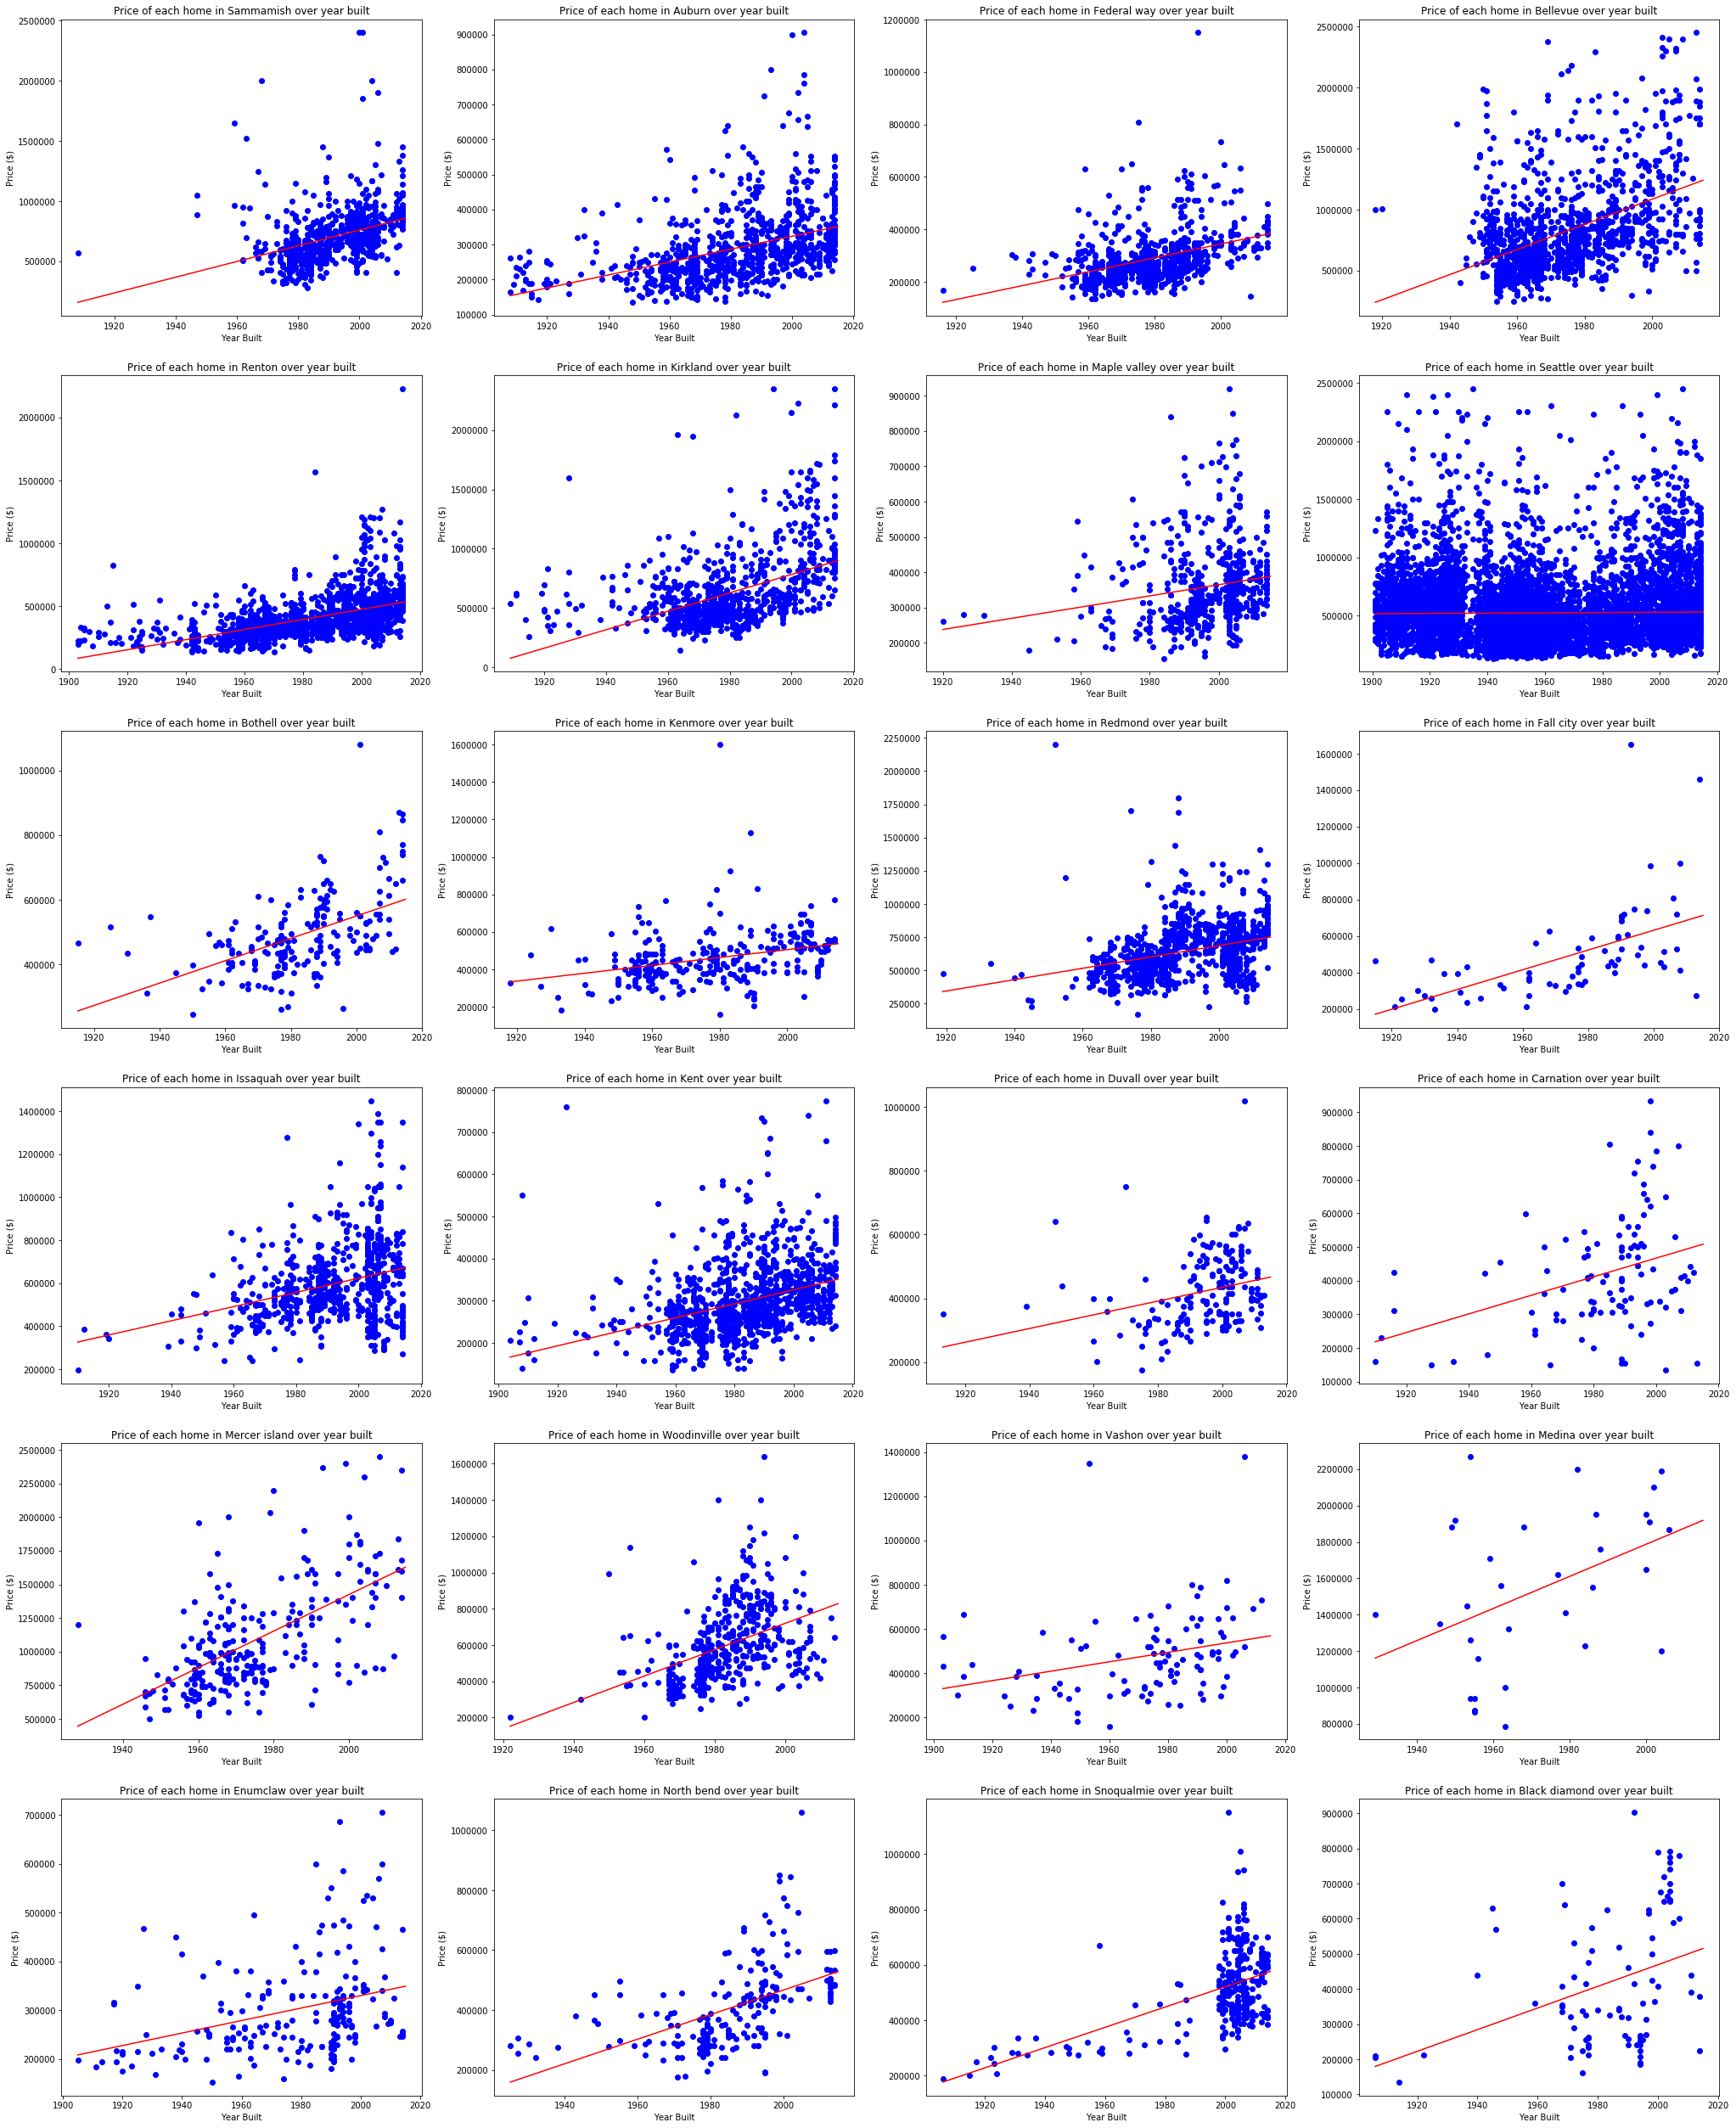

In [0]:
ROW = 6
COL = 4
counter = 0
cap = COL
fig, axes = plt.subplots(ROW, COL, figsize=(35, 45))

cities = set(normalized_df["city"])
sum_slope = 0

for city in cities:
  r, c = convert_1d_to_2d(counter, cap)
  counter += 1

  sub_df = normalized_df[normalized_df["city"] == city]
  axes[r, c].set_title("Price of each home in {}{} over year built" \
                        .format(city[0].upper(), city[1:]))
  axes[r, c].set_xlabel("Year Built")
  axes[r, c].set_ylabel("Price ($)")
  x = sub_df["non_normalized_yr"]
  y = sub_df["price"]
  axes[r, c].plot(x, y, "bo")
  model = LinearRegression()
  model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
  xs = np.linspace(np.min(x), 2015, 5)
  ys = model.predict(xs[:, np.newaxis])
  sum_slope += model.coef_[0,0]
  axes[r, c].plot(xs,ys, "-r")

In [0]:
# Calculate the average slope across all cities.
average_slope = sum_slope / len(cities)
average_slope

4327.107123309229

# Analysis - Visual Representation of Price Changes Over Time Across All Cities

The code above plots every house's price and year for each city. In addition, the data is fitted with a linear regression which is plotted in red, indicating a potential trend between Year and price. By looking at the graphs, it is clear that for the most part the slope of each trend line increases. This is verified by the calculation below that averages the slopes of all fitted lines. The average slope is 4327.107123309228 which means that the house price across the entire country increases by $4327.11 per year. This explains a general increase in housing costs over time.

---
# Visual Representation of Housing Cost Respective to Location

In order to see what the current prices of houses look like across King County, a subset of the house listings will be plotted using the longitude, latitude, and price fields. The map below displays the location of houses put on sale and their respective cost. Using a normalized price column from the dataframe, values that are closer to 1 are more red (signifiying highness in price), and values closer to 0 are more green (hinting lowness in price).

In [0]:
normalized_df['norm_price']= norm(normalized_df['price'])
normalized_county_df = normalized_df.sample(n=1350)

# Example 
def randome_points(amount, LON_min, LON_max, LAT_min, LAT_max):
    points = []

    for _ in range(amount):
        points.append((random.uniform(LON_min, LON_max),
                       random.uniform(LAT_min, LAT_max)))

    return(points)

# Function to draw points in the map
def draw_points(map_object, list_of_points, layer_name, line_color, 
                fill_color, text, prices):

    fg = folium.FeatureGroup(name=layer_name)

    for i in range(len(list_of_points)):
        curr_point = prices[i]
        point = list_of_points[i]
        slope = 510
        green = 255
        red = 0

        if curr_point < 0.5:
          green = 255
          red = curr_point * slope
        else:
          red = 255
          green = -510 * curr_point + 510
          
        clr = '#{:02x}{:02x}{:02x}'.format( int(red), int(green) , 60)
        fg.add_child(folium.CircleMarker(point, radius=4, color=clr, 
                                         fill_color=clr, fill=True ,
                                         popup=(folium.Popup(text)),
                                         fill_opacity=1))

    map_object.add_child(fg)

# Taking the longitude and latitude value for each house
price_lon = np.array(list(normalized_county_df['long']))
price_lat = np.array(list(normalized_county_df['lat']))
price_lon_lat = list(zip(price_lat, price_lon))
my_map_global = folium.Map(location=[47.5,-122.3], zoom_start=10)

# Relative price represented as a color 
# More Green = cheaper
# More Red = more expensive
draw_points(my_map_global, price_lon_lat, layer_name='Test',
            line_color='royalblue', fill_color='royalblue', 
            text='Feature Point for house', 
            prices=list(normalized_county_df['norm_price']))
normalized_df = normalized_df.drop(['norm_price'],axis=1)
my_map_global

# Analysis - Visual Representation of Housing Cost Respective to Location

Analyzing the map, it is clear that there is a significant amount of cheaper houses in most areas of Seattle. Bellvue, on the other hand, tends to be more expensive for most houses. Looking South of Lake Washington and Seattle, almost all houses are cheap with no hints of red and only green. This changes as we get closer to the center of the city where most of the red dots are located. First, houses on Mercer Island tend to be moderately to very expensive. Similarly, houses on the Northern part of Seattle are costlier than the south. Bellevue is different from Seattle as more expensive homes are in the center, South, and East of the city. 

Overall, the biggest key point is that homes nearest to the center of the city and close to a water source tend to be more expensive. 




---
# Visual Representation of Congestion Using K-Means

In [0]:
def dist(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def avg(xys):
    xs = [i[0] for i in xys]
    ys = [i[1] for i in xys]
    
    return (np.mean(xs), np.mean(ys))

# Performing K-Means + Congestedness Analyzer
def k_means(xs, ys, k=5, epoch=10):
    least_variance = float('inf')
    best_clusters = []
    best_centroids = []
    size = len(xs)
    
    for ep in range(epoch):
        centroids = [(xs[i], ys[i]) for i in np.random.choice(size, k)]
        clusters = [[] for i in range(k)]
        
        for ind in range(size):
            x = xs[ind]
            y = ys[ind]
            
            point = (x, y)
            closest = float('inf')
            closest_centroid = -1
            
            for centroid_ind in range(len(centroids)):
                distance = dist(centroids[centroid_ind][0], 
                                centroids[centroid_ind][1], 
                                point[0], point[1])
                
                if distance < closest:
                    closest = distance
                    closest_centroid = centroid_ind
                    
            clusters[closest_centroid].append(point)
            centroids[closest_centroid] = avg(clusters[closest_centroid])
        
        variance = 0
        
        for ind in range(k):
            for pt in clusters[ind]:
                variance += dist(pt[0], pt[1], 
                                 centroids[ind][0], centroids[ind][1])
        
        if variance < least_variance:
            best_clusters = clusters
            least_variance = variance
            best_centroids = centroids

    colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown']
    circles = []
    order = {}
    
    for i in range(k):
        xs = [x[0] for x in best_clusters[i]]
        ys = [y[1] for y in best_clusters[i]]
        centroid = best_centroids[i]
        
        longest_distance = 0
        
        for j in range(len(xs)):
            x = xs[j]
            y = ys[j]
            distance = dist(x, y, centroid[0], centroid[1])
            
            if distance > longest_distance:
                longest_distance = distance
          
        order[i] = longest_distance

    order = sorted(order.items(), key=lambda x: x[1])
    
    for ind in range(k): 
        elm = order[ind][0]
        folium.Popup(best_centroids[elm][0], best_centroids[elm][1], ind + 1)

        folium.Circle(radius=10000,
                            color=colors[ind],
                            fill=True,
                            location=[best_centroids[elm][0], 
                                      best_centroids[elm][1]],
                            popup='Congestedness Rank: {}'.format(int(ind) + 1)
                            ).add_to(visual_map)
    

def find_most_dangerous_regions_in_washington(separated_by=3, accuracy=10):
    k_means(normalized_df['lat'].values, 
            normalized_df['long'].values, 
            min(separated_by, 7), 
            max(accuracy, 10))
    
visual_map = folium.Map(location=[47.5, -122.3], zoom_start=10)

find_most_dangerous_regions_in_washington(5, 30)

visual_map

# Analysis - Visual Representation of Congestion Using K-Means

**Note: Click on each circle to see which rank it falls under in terms of congestion (1 being most congested, 5 being least congested)**

Based on the report above performed using k-means, it can be observed that the upper left corner region is the most concentrated and the eastern region is the least concentreated.

---

# HeatMap of House Listing Congestion

In [0]:
map_osm = folium.Map(location=[47.5, -122.3], zoom_start=10)
coords = normalized_df.sample(n=1200).as_matrix(["lat", "long"])
HeatMap(coords, radius=17.5).add_to(map_osm)
map_osm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# Analysis - HeatMap of House Listing Congestion

The above Heat Map is used to present the density of the dataset in specific locations in King County. The K-Means algorithm found the top 5 densest areas, while the heatmap can be used to determine the overall density distribution in the sample. There is high congestion near bodies of water, with some congestion towards the bottom near Auburn, Snoqualmie, and Maple Valley.

How to create a HeatMap with Python: [link](https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf)

---

# Feature Engineering Through PCA

For the following part, principal component analysis is performed to understand which features contribute the most to variance as well as how many principal components are needed for linear regression.

If you would like to learn more about PCA, here is a helpful tutorial: [link](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

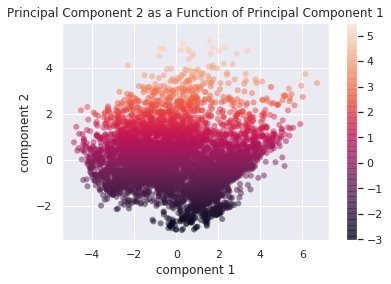

In [0]:
sns.set()

# Selecting numerical columns only for PCA
sub_df = normalized_df[['bedrooms', 'bathrooms', 'sqft_interior', 'floors', 
                      'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 
                      'sqft_lot']]

# Standardizing the data
sub_df = (sub_df - sub_df.mean()) / sub_df.std()

# Using a subset of the dataset (5000 rows)
sample_subset = sub_df.sample(n=5000).values

pca = PCA(2)  # project from 10 to 2 dimensions
projected = pca.fit_transform(sample_subset)
plt.scatter(projected[:, 0], projected[:, 1], 
            c=projected[:,1], edgecolor='none', alpha=0.5)
plt.title('Principal Component 2 as a Function of Principal Component 1')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [0]:
# Printing the captured variance of the principal components
pc1_var, pc2_var = pca.explained_variance_ratio_

print('Total Variance captured by PC1: ' + str(pc1_var*100)[0:5] + \
      '%\nTotal Variance captured by PC2: ' + str(pc2_var*100)[0:5] + '%')
print('Total Variance captured: ' + str((pc1_var + pc2_var)*100)[0:5] +'%\n')
print('\t\t\t\tWeight Vector for each Principal Component')

principal_cp = pd.DataFrame(pca.components_,
                            columns=sub_df.columns,
                            index = ['PC-1','PC-2'])
principal_cp

Total Variance captured by PC1: 40.60%
Total Variance captured by PC2: 16.34%
Total Variance captured: 56.95%

				Weight Vector for each Principal Component


,bedrooms,bathrooms,sqft_interior,floors,view,condition,grade,yr_built,yr_renovated,sqft_lot
PC-1,0.254127,0.421403,0.388213,0.338101,0.065304,-0.178192,0.394131,0.379881,0.391268,0.063727
PC-2,0.371602,0.154623,0.379744,-0.168209,0.399196,0.433810,0.183821,-0.370014,-0.357151,0.140349


# Analysis - Feature Engineering Through PCA

The plot above illustrates the variance captured by the top 2 principal components. 

As depicted, the best principal component only captures 40.60% of the total variance. This is quite low, and adding the second principal component sums up to 56.95%, which is still quite low. 

To explore the features that contributed the most to the variance, the linear combinations of the features of each principal component are shown. This table also represents the correlation for each principal component to each weight. 

For PC1, the features with the highest weights are (from highest to lowest): grade, sqft_interior, and bathrooms. For PC2, the highest weights are condition, view, and bedrooms, respectively. 

Although the correlation is not significantly high, it is important to note that these features contribute the most to maximizing the variance. To obtain a better estimate, the 10-dimensional points will be projected onto a 3-dimensional subspace.


---

# 3D Visual Representation of PCA

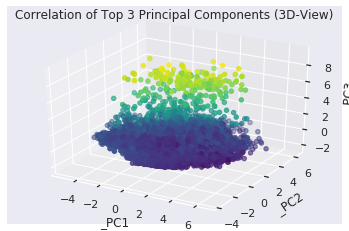

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
pca = PCA(3)  # project onto the 3 dimension subspace
projected = pca.fit_transform(sub_df)

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.set_xlabel('_PC1')
ax.set_ylabel(' _PC2')
ax.set_zlabel(' _PC3')
ax.set_title('Correlation of Top 3 Principal Components (3D-View)')
ax.scatter3D(projected[:,0], projected[:,1], projected[:,2], 
             c=projected[:,2], cmap='viridis');

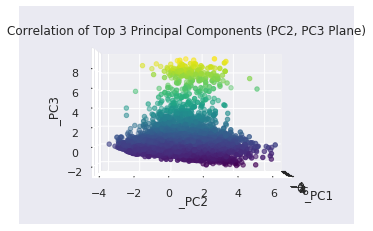

In [0]:
# Visualizing the side view
ax.view_init(0, 0)
ax.set_title('Correlation of Top 3 Principal Components (PC2, PC3 Plane)')
fig

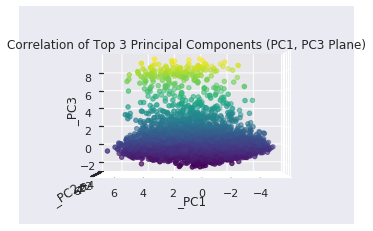

In [0]:
ax.view_init(0, 90)
ax.set_title('Correlation of Top 3 Principal Components (PC1, PC3 Plane)')
fig

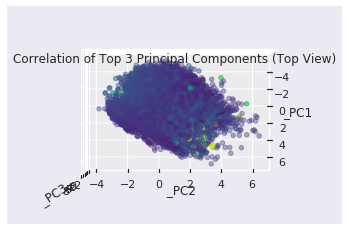

In [0]:
ax.view_init(90, 0)
ax.set_title('Correlation of Top 3 Principal Components (Top View)')
fig

In [0]:
pc1_var, pc2_var, pc3_var = pca.explained_variance_ratio_

print('Total Variance captured by PC1: ' + str(pc1_var*100)[0:5] + 
      '%\nTotal Variance captured by PC2: ' + str(pc2_var*100)[0:5] +
      '%\nTotal Variance captured by PC3: ' + str(pc3_var*100)[0:5] + '%')
print('Total Variance captured: ' + \
      str((pc1_var + pc2_var + pc3_var) * 100)[0:5] +'%\n')
print('\t\t\t\tWeight Vector for each Principal Component')

principal_cp = pd.DataFrame(pca.components_,
                            columns=sub_df.columns,
                            index = ['PC-1','PC-2','PC-3'])
principal_cp

Total Variance captured by PC1: 40.57%
Total Variance captured by PC2: 16.41%
Total Variance captured by PC3: 10.07%
Total Variance captured: 67.06%

				Weight Vector for each Principal Component


,bedrooms,bathrooms,sqft_interior,floors,view,condition,grade,yr_built,yr_renovated,sqft_lot
PC-1,0.249287,0.422444,0.385819,0.335269,0.066172,-0.179784,0.392958,0.383673,0.394056,0.067333
PC-2,0.389364,0.161152,0.382412,-0.171851,0.363816,0.432577,0.186460,-0.371291,-0.361747,0.153893
PC-3,-0.267581,-0.117299,-0.000814,-0.157702,0.182323,-0.162414,0.043415,0.062189,0.066711,0.905510


# Analysis - 3D Visual Representation of PCA
The four plots above display the projection of the 10-dimensional feature of a house listing onto a 3 dimensional subspace from different angles. The results are similar to 2D, yet not much better (67.06% captured variance). When observed closely, PC3 appears to correlate strongly with view.

This result, along with a low total variance, implies that the percentage of total variance is dependent on more than 3 features to create a plausible recreation in 10-D. 

---

# 8-Dimension PCA Analysis

In [0]:
pca = PCA(8)  # project from 10 to 8 dimensions
projected = pca.fit_transform(sub_df)
total_var = sum(pca.explained_variance_ratio_)
'Total Variance captured by PC1-PC8: ' + str(total_var * 100)[0:5] + '%\n'

print('\t\t\t\tWeight Vector for each Principal Component')

principal_cp = pd.DataFrame(pca.components_,
                            columns=sub_df.columns,
                            index = ['PC-1','PC-2','PC-3',
                                     'PC-4','PC-5', 'PC-6',
                                     'PC-7', 'PC-8'])
principal_cp

				Weight Vector for each Principal Component


,bedrooms,bathrooms,sqft_interior,floors,view,condition,grade,yr_built,yr_renovated,sqft_lot
PC-1,0.249287,0.422444,0.385819,0.335269,0.066172,-0.179784,0.392958,0.383673,0.394056,0.067333
PC-2,0.389364,0.161152,0.382412,-0.171851,0.363816,0.432577,0.186460,-0.371291,-0.361747,0.153893
PC-3,-0.267581,-0.117299,-0.000814,-0.157702,0.182323,-0.162414,0.043415,0.062189,0.066711,0.905510
PC-4,-0.376199,-0.049890,-0.070136,0.122230,0.827062,-0.210512,0.118356,-0.042912,-0.003218,-0.303182
PC-5,0.422692,-0.080785,0.104843,-0.211347,0.004568,-0.819606,-0.080414,-0.214931,-0.182359,-0.038146
PC-6,-0.271387,-0.016248,0.090580,0.666450,-0.272207,-0.142503,0.260763,-0.398077,-0.376420,0.105667
PC-7,0.402812,0.039166,-0.262084,0.546205,0.261304,0.070022,-0.594350,0.014039,0.027228,0.204469
PC-8,-0.344525,0.799870,0.089723,-0.155936,-0.054144,-0.107525,-0.406742,-0.148118,-0.085250,0.002300


# Analysis - 8-Dimension PCA

Projecting the 10-D vector onto 8-D gave the highest variance (97% variance). Although this not optimal, the variance suggests that most of the features combined give the highest variance of the data. The features with the highest weights above will be used for linear regression below. However, it is still unclear which features are the most impactful for linear regression therefore, a correlation table will be used below to give a better idea of what features contribute the most.

---
# Correlation
The code below is used to find the correlation between all features including price. The code takes the normalized data and finds the correlation between every pair of features including price. Using the correlation matrix plot produced by seaborne, it is clear what features are highly correlated by going down the price column and analyzing the correlation values. 

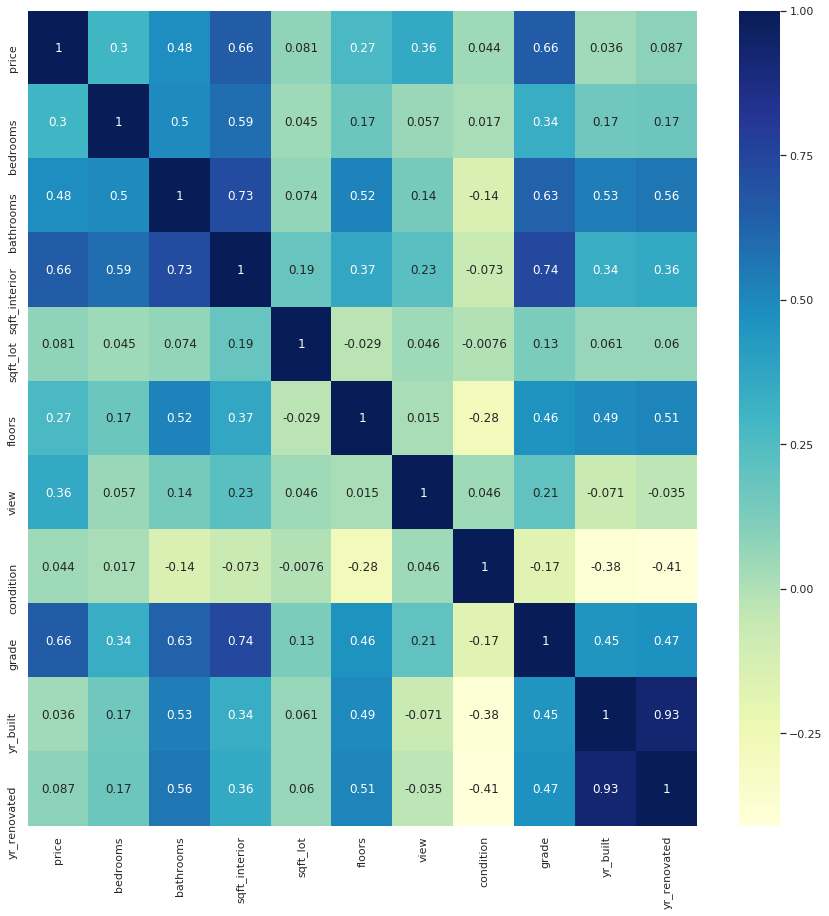

In [0]:
data = normalized_df[normalized_df.columns[:-4]]
data = data.drop(["non_normalized_yr"], axis=1)

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

# Code referenced from 
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# Refer to the link above to learn more about feature extraction techniques.

# Analysis - Correlation
After looking at the highest correlations with price, the top correlated features were selected. Some features had correlations close to 0, which indicated that there was little correlation with that feature to the price. These include year renovated and year built. These are dropped in the prediction algorithm below.


---
# Predicting the Price in Each Zipcode 
Intuitively, it is hard to map a linear relationship with zipcode as a feature, because each zipcode has different price ranges, and some are extremely varied in terms of housing prices. For example, a zipcode in Seattle has many houses with the same statistics, yet have highly different prices. This makes it hard to fit a generalized regression for all of King County.

Of course the zipcode can be vectorized as <0, 1, 0, ... 0> (aka one-hot encoding) for all zipcodes to keep using the entire dataset; however, higher accuracies could be achieved by splitting into different zipcodes and fitting a linear regression on each zipcode. The code then plots the average accuracy from 5-fold cross validation to see how accurate the linear regression was on each zipcode.

The code below does this on each zipcode, fitting a regression using these features:
bathrooms, bedrooms, condition, floors, grade, sqft_interior, sqft_lot, view

0.6333897470785739

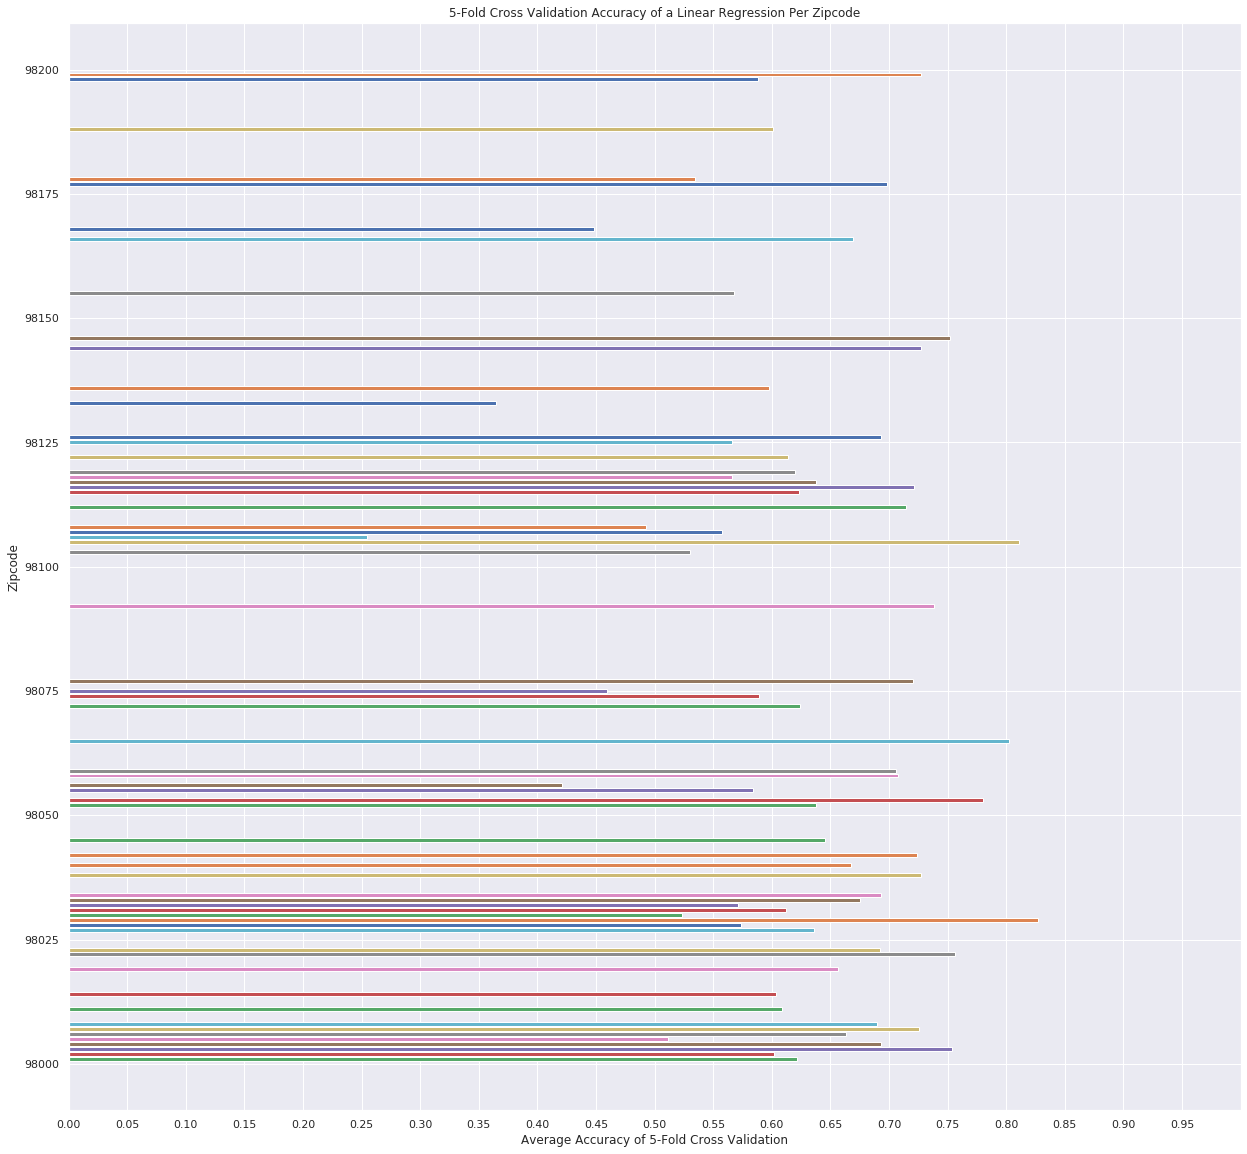

In [0]:
# Plot the 5 fold cross validation for each zipcode's houses.
f, ax = plt.subplots(figsize=(21,20))

# Get unique zipcodes
zipcodes = set(normalized_df["zipcode"])

# Remove zipcodes with less than 100 homes (fails when doing cross validation)
filtering = lambda x: len(normalized_df[normalized_df["zipcode"] == x]) > 100
zipcodes = set(filter(filtering, zipcodes))

# Used to calculate total accuracy across all zipcodes.
total = 0
pos_zipcodes = 0

# This dictionary stores the fitted regression for each zipcode
regressions = {}

plt.xticks(np.arange(0, 1, step=0.05))
plt.xlim(0, 1)
plt.title("5-Fold Cross Validation Accuracy of a Linear Regression Per Zipcode")
plt.xlabel("Average Accuracy of 5-Fold Cross Validation")
plt.ylabel("Zipcode")

for zipcode in zipcodes:
  # Get the data associated with the current zipcode
  X = normalized_df[normalized_df["zipcode"] == zipcode]
  Y = X["price"].values.ravel() 

  # Keep the needed features and convert to matrix for regression
  X = X[['bathrooms', 'bedrooms', 'condition', 'floors', 'sqft_interior', 
         'sqft_lot', 'view', 'yr_renovated']].values

  # Linear regression on the data 
  clf = LinearRegression()

  # Average the 5 cross validation folds
  avg = np.average(cross_val_score(clf, X, Y, cv=5))

  # If the cross validations were successful
  if avg > 0:
    total += avg 
    pos_zipcodes += 1

    # Fit the current data to the current zipcode's data
    clf.fit(X, Y)

    # Add to the dict for later
    regressions[zipcode] = clf

    # Plot the data
    plt.barh(zipcode, avg)

# Return the average accuracy across all zipcodes
total / pos_zipcodes

# Analysis - Predicting the Price in Each Zipcode

The plot above depicts the average of 5-fold cross validation of a linear regression on each zipcode. The regression was fitted on house attributes in order to predict the price using supervised learning. As mentioned earlier, some cities with varied housing costs with the same attributes, performed poorly on the tests, which is shown by the sub .50 percentage accuracy. This is expected given that each zipcode may have may variable housing. A slum and a rich neighborhood in the same zipcode are an example of what causes low accuracies. The zipcode is the smallest scope that the data ne reduced to, in order to have sufficent data for the regression.

Redmond is an example of a mostly uniform city, where most of the house listings are near each other; even at the zipcode level. Many high-tech companies such as Microsoft are in Redmond, and many of the zipcodes are near the waterfront, which means that Redmond will have high costs all around; explaining the high accuracy shown in the plot.

Another reason that the accuracy is not that close to 1 is that prices are not completely 'fact-based' but rather some suggested figures by the seller.

**Resources**

Refer to this resource for more information regarding linear regression and how it can be used in Scikit Learn.

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


For more information regarding K-Fold Cross Validation (K = 5 in the above code), refer to the link below.

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

---
# House Price Predictor
Below is a class that will be used for predicting the price of a house based on 
  the user's input of a house's attributes.

In [0]:
class UserInputError(Exception):
  def __init__(self, expression):
        self.expression = expression

class House_Price_Predictor:
  # If you do not have a datum on a feature, just pass in a -1.
  def __init__(self,
               bathrooms=-1, 
               bedrooms=-1, 
               condition=-1,
               floors=-1,
               sqft_interior=-1,
               sqft_lot=-1, 
               view=-1, 
               yr_renovated=-1,
               regressions=None,
               df=None,
               alternative_array=None):
    
    if df is None:
      raise UserInputError('You must have a dataframe to' + \
                           'base the prediction on!')
    elif regressions is None:
      raise UserInputError('You must have a regression to' + \
                           'base the prediction on!')
      
    self.df = df
    self.regressions = regressions
    self.normalized_fields = None
    self.attributes = {
          'bedrooms': bedrooms,
          'bathrooms': bathrooms,
          'condition': condition,
          'floors': floors,
          'sqft_interior': sqft_interior,
          'sqft_lot': sqft_lot,
          'view': view,
          'yr_renovated': yr_renovated
    }

    if alternative_array == None:
      count = len(list(filter(lambda x: x < -1, self.attributes.values())))

      if count != 0:
        raise UserInputError('All values should be non-negative unless N/A. ' + 
                             'Please check your input!')
    else:
      if len(alternative_array) != len(self.attributes):
        raise UserInputError('You are missing data. Please check your input!')

      for i in range(len(self.attributes)):
        self.attributes[list(self.attributes.keys())[i]] = alternative_array[i]

      count = len(list(filter(lambda x: x < -1, self.attributes.values())))
      
      if count != 0:
        raise UserInputError('All values should be non-negative unless N/A. ' + 
                             'Please check your input!')

  def get_attributes(self):
    return self.attributes

  def get_unknown_attributes(self):
    return list(filter(lambda k: self.attributes[k] == -1, self.attributes))

  def get_known_attributes(self):
    known_map = {}
    unknown_map = self.get_unknown_attributes()

    for k, v in self.attributes.items():
      if k not in unknown_map:
        known_map[k] = v

    return known_map

  def norm(self, val, arr):
    minimum = min(arr)
    maximum = max(arr)

    return (val - minimum) / (maximum - minimum)

  def normalize(self):
    known = self.get_known_attributes()
    self.normalized_fields = {}

    raw = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition', 
           'grade', 'yr_renovated']
    for feature in raw:
      if feature in known:
        norm = self.norm(self.attributes[feature], self.df[feature])
        self.normalized_fields[feature] = norm
      else:
        self.normalized_fields[feature] = 0.5

    if 'sqft_interior' in known:
      interior = np.array(self.df['sqft_above']) + \
                 np.array(self.df['sqft_basement']) + \
                 np.array(self.df['sqft_living'])

      cleaned_df = np.percentile(interior, [1, 99])
      norm = self.norm(self.attributes['sqft_interior'], cleaned_df)
      self.normalized_fields['sqft_interior'] = norm
    else:
      self.normalized_fields['sqft_interior'] = 0.5
    
    if 'yr_renovated' in known:
      self.df = self.df.reset_index()

      COUNT = len(self.df)
      renovated = [self.df['yr_built'][i] if self.df['yr_renovated'][i] == 0 \
                   else self.df['yr_renovated'][i] for i in range(COUNT)]
      
      norm = self.norm(self.attributes['yr_renovated'], renovated)
      self.normalized_fields['grade'] = norm
    else:
      self.normalized_fields['yr_renovated'] = 0.5

    for i in self.normalized_fields:
      if self.normalized_fields[i] < 0:
        self.normalized_fields[i] = 0
      elif self.normalized_fields[i] > 1:
        self.normalized_fields[i] = 1

    return self.normalized_fields

  def predict(self, zipcode):
    self.normalize()

    zipcodes = set(regressions.keys())

    if zipcode not in zipcodes:
      raise UserInputError('You entered an incorrect zipcode.')
      
    keys = sorted(self.normalized_fields.keys())
    keys.remove('yr_renovated')
    arr = [self.normalized_fields[k] for k in keys]

    return np.dot(arr, self.regressions[zipcode].coef_)
  

**Explanation of Input Data for Prediction:**

Input:
*   bedrooms: # of bedrooms
*   bathrooms: # of bathrooms
*   condition: Rating of the physical condition and appearance of the house. Out of 5 where 1 is the worst, and 5 is the best.
*   floors: # of floors
*   sqft_interior: the size of the interior of a house in sqft
*   sqft_lot: the size of the lot of a house in sqft
*   view: Rating of the outdoor view of the land and house. Out of 4 where 0 is the worst, and 4 is the best.
*   yr_renovated: the year in which the building was renovated.  If never renovated, put the year the house was built instead. **Note** that as mentioned above, this feature is dropped due to low correlation. This is used to fill in "grade" of a house because no website provides the grade of a house. Usually an inspector visits the house to provide a rating (grade) of the construction materials of the house. Using domain knowledge and intuition, construction materials are typically better the newer the house is. Therefore to fill in the missing data, we use yr_renovated to determine the grade of the listings below. Grade and yr_renovated are correlated (.47) when looking at the correlation matrix earlier, proving the credibility of this method.

Output: 

* Price prediction for the above features.

# Notes
* This prediction is for the buyer in estimating what the value of a house is in relation to neighboring houses and attributes.
* It is hard to match the price in this dataset to today's prices in King County due to inflation since 2014. Houses are much higher than before so the above examples are under the assumption that the listing is between 2014-2015. The attributes themselves are real and are pulled from Zillow, Redfin, etc.
* Keep in mind that it is up to the seller's discretion to set a price. The algorithm finds the typical price given these features. The main point of the algorithm is to determine the value of the house solely based on attributes.

---
# House 1: Redmond

<img src='https://photos.zillowstatic.com/cc_ft_960/ISyfywnwt56npx0000000000.webp' />

13530 NE 78th Pl, Redmond, WA 98052



* Bedrooms: 3
* Bathrooms: 2
* Floors: 1
* Interior: 1,320 sqft
* Lot Size: 9,243 sqft
* Year built: 1971
* 2019 Listing Price: $750,000





In [0]:
# Inputs in order:
data = [3, 2, 2, 1, 1320, 9243, 2, 1971]
predictor = House_Price_Predictor(alternative_array=data, df=df, 
                                regressions=regressions)

print("Expected price: $" + str(round(predictor.predict(98052), 2)))

Expected price: $702789.47


# Analysis - House 1

The house's expected price should be around $702,789.47 to match neighboring listings. Compared to the listing price, it can be said that the house has high value.


---
# House 2: Snoqualmie

<img src='https://static.trulia-cdn.com/pictures/thumbs_6/zillowstatic/ISnaaxnluku1ro0000000000.webp' />

6604 Denny Peak Dr SESnoqualmie, WA 98065

* Bedrooms: 5
* Bathrooms: 4
* Floors: 3
* Interior Size: 3,880 sqft
* Lot Size: 8,080 sqft
* Year built: 2007
* 2019 Listing Price: $1,079,000




In [0]:
"""
bedrooms
bathrooms
condition -- subjective / 5
floors
sqft_interior
sqft_lot
view -- subjective / 4
yr_renovated
"""

data = [5, 4, 5, 3, 3880, 8080, 3, 2007]
predictor = House_Price_Predictor(alternative_array=data, df=df, 
                                regressions=regressions)
# Must pass in zipcode as it is not used as a feature.
print("Expected price: $" +  str(round(predictor.predict(98065), 2)))

Expected price: $826840.74


# Analysis - House 2 - Part I
Given these features, a buyer should expect the price to be around $826,840.74 which is close to the seller's asking price. The price is pretty fair given the house's attributes.

In [0]:
data = [5, 4, 5, 3, 3880, 8080, 3, 2007]
predictor = House_Price_Predictor(alternative_array=data, df=df, 
                                regressions=regressions)
# Zip code in the heart of Seattle
print("Expected price: $" + str(round(predictor.predict(98105), 2)))

Expected price: $4087270.38


# Analysis - House 2 - Part II

The above code uses the exact same house from above (House 2) and tests the prediction algorithm in a zipcode in Seattle. Given that the price has increased nearly fivefold, this indicates that the algorithm works as intended as Seattle has much higher housing costs than does Snoqualmie. The same attributes are worth much more in Seattle which demonstrates that it was beneficial to train a linear regression by zipcode to match neighboring costs and predictions.

Lastly, some zipcodes have very diverse housing costs, which is why some zipcodes will produce poor results. This is shown by the 5 fold accuracy graph above. To improve this algorithm, there needs to be much more data to reduce the scope smaller than zipcode to the neighborhood level. This will improve accuracy due to shared pricing and house attributes.